In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from definitions import ROOT_DIR
import matplotlib.pyplot as plt

In [3]:
# Paths
p_root_dir = Path(ROOT_DIR)
p_analysis = p_root_dir  / "6_plots/q2"
p_stats = p_root_dir / "5_well_classification/only_target_wells_with_classification.csv"

In [4]:
stats = pd.read_csv(p_stats)
stats.neutral_loss.fillna('', inplace=True)
stats.set_index(['formula', 'adduct', 'neutral_loss', 'dataset_id'], inplace=True)
stats.sort_index(inplace=True)

# Internal figure:
Which compounds were detected with which matrix so far?

In [ ]:
df=stats

In [ ]:
# formula_ds_long = df_subset.groupby(['formula', 'dataset_id']).agg(
#     {'is_well_filled': sum,
#      'well':'first'})
# formula_ds_long = formula_ds_long.reset_index()

# formula_ds = formula_ds_long.pivot("dataset_id", "formula", "is_well_filled")
# formula_ds.fillna(0, inplace=True)

In [ ]:
adduct_subset = ['', '-H2O']#, '+H2', '-CH2O2', '-CH2O3', '-CO2', '-H2', '-H2O', '-NH3']
df_subset = df.loc[(slice(None),slice(None),adduct_subset), :]

# df_subset=df

In [ ]:
test = df_subset.groupby(['formula', 'dataset_id']).agg({
    'is_well_filled': sum,
    'well':'first'})
test.reset_index(inplace=True)

In [ ]:
# in how many datasets molecule was detected (at least in one form)
test = test.groupby(['formula']).agg({
    'is_well_filled':np.count_nonzero,
    'well':'first'
})

In [ ]:
molecules = pd.read_csv(p_analysis / "Well_2_compound.csv")[['well', 'short','hmdb_primary']]
hmdb_pka = pd.read_csv(p_analysis / "hmdb_pka.csv", skiprows=1)

test2 = pd.merge(test, molecules, left_on = 'well', right_on = 'well', how='left')
test3 = pd.merge(test2, hmdb_pka, on = 'hmdb_primary', how='left')

In [ ]:
hmdb_classyfire_p = p_analysis / "hmdb_classyfire.csv"
hmdb_classyfire = pd.read_csv(hmdb_classyfire_p, skiprows=1)

mapping = pd.merge(test3[['hmdb_primary']], hmdb_classyfire, on='hmdb_primary', how='left')

In [ ]:
classes = [
#         'Lipids and lipid-like molecules',
        'Fatty Acyls', 
        'Steroids and steroid derivatives', 
        'Glycerophospholipids',
        'Prenol lipids',
        'Sphingolipids',
    
        'Nucleosides, nucleotides, and analogues',
    
#         'Organic acids and derivatives',
        'Organic sulfonic acids and derivatives',
        'Keto acids and derivatives', 'Carboxylic acids and derivatives',
        'Organic phosphoric acids and derivatives',
        'Hydroxy acids and derivatives', 'Peptidomimetics',
    
#         'Amino acids, peptides, and analogues',
        'Peptides', 'Aspartic acid and derivatives', 'Dipeptides',
       'Beta amino acids and derivatives',
       'Glutamic acid and derivatives', 'Oligopeptides',
       'Alpha amino acids', 'Cysteine and derivatives',
       'Serine and derivatives', 'L-alpha-amino acids',
       'Alpha amino acids and derivatives', 'Asparagine and derivatives',
       'Gamma amino acids and derivatives', 'Valine and derivatives',
       'Methionine and derivatives', 'Proline and derivatives',
       'L-cysteine-S-conjugates', 'Histidine and derivatives',
       'Phenylalanine and derivatives', 'Tyrosine and derivatives',
    
        'Carbohydrates and carbohydrate conjugates',
#         'Indoles and derivatives',
        'Tryptamines and derivatives',
       'Indolyl carboxylic acids and derivatives', 'Indoles',
    
        'Imidazoles',
        'Alcohols and polyols',
        'Amines',
        'Quinolines and derivatives',
    
#         'Pyrimidines and pyrimidine derivatives',
    'Thiamines', 'Pyrimidones', 'Pyrimidinecarboxylic acids',
       'Hydroxypyrimidines',
    
        'Purines and purine derivatives',
        'Pyridines and derivatives'
        ]

mapping['my_class'] = 'Other'

for i, item in enumerate(classes):
        # Term search is independent of whether it's superclass, class, sub-class etc.
        select_rows = mapping.isin([item]).any(axis=1)
        mapping.loc[select_rows, 'my_class'] = item


In [ ]:
test4 = pd.merge(test3.replace(np.nan, 'no id'), mapping[['hmdb_primary', 'my_class']], on='hmdb_primary', how='left').replace(np.nan,'Other')

In [ ]:
# n=50
# test4.sort_values('is_well_filled')[n+0:n+25]

In [ ]:
# import seaborn as sns
# # sns.set_theme()

# # Draw a heatmap with the numeric values in each cell
# f, ax = plt.subplots(figsize=(9, 6))
# sns.heatmap(formula_ds, annot=True, linewidths=.5, ax=ax)

In [ ]:
plt.plot(test4.sort_values('is_well_filled')['is_well_filled'].values)
plt.xlabel('how many molcules')
plt.ylabel('detected n times')

In [ ]:
test4.sort_values('is_well_filled')[0:25]

In [ ]:
plt.figure(figsize=(4,12))
plt.scatter(test4.sort_values('is_well_filled')['is_well_filled'].values, test4.sort_values('is_well_filled')['my_class'].values)
plt.xlabel("Molecule in the category detected in n datasets")
# plt.xlim([-1,140])

In [ ]:
uniques = test4.my_class.unique()
pos = [(x, np.where(uniques == x)[0]) for x in test4.sort_values('is_well_filled')['my_class']]

# Q2A mock figure

- load stats (how did you create these? is_target=True, both ratios > 20, min pixels occupied = 3)
- aggregare adduct and neutral losses
- map ds_id to matrix and polrity
- map well to expected HMDB to its class
- plot class vs n detections (normalised?) vs matrix (polarity)

In [132]:
p_datasets = p_analysis / "Datasets.csv"
p_class = p_analysis / "full_classification.csv"
p_well_to_compound = p_analysis / "Well_2_compound.csv"

In [133]:
datasets = pd.read_csv(p_datasets)
classes = pd.read_csv(p_class, index_col=0)
well_to_compound = pd.read_csv(p_well_to_compound)[['well', 'short', 'hmdb_primary']]

In [217]:
# just look at a few neutral losses for now
adduct_subset = [''] #, '-H2O', '+H2', '-CH2O2', '-CH2O3', '-CO2', '-H2', '-H2O', '-NH3']
stats_subset = stats.loc[(slice(None),slice(None),adduct_subset), :]

In [305]:
# drop all empty images
stats_subset = stats_subset.loc[stats_subset.image_quality_predicted == 1]

In [306]:
# aggregate info per molecule per dataset
df = stats_subset.groupby(['formula', 'dataset_id']).agg({
    'is_well_filled' : max,
    'well' : 'first',
    'sum' : sum}) # add up intensity of every adduct
df.reset_index(inplace=True)

In [307]:
# add dataset metadata
dataset_metadata = datasets[['Clone ID', 'Matrix short', 'Polarity']].drop_duplicates()
df = pd.merge(df, dataset_metadata, left_on='dataset_id', right_on='Clone ID', how='left')

In [308]:
# add HMDB ids
df = pd.merge(df, well_to_compound, left_on = 'well', right_on = 'well', how='left')

In [309]:
# add chemical class
df = pd.merge(df.replace(np.nan, 'no id'), classes[['hmdb_primary', 'coarse_class']], on='hmdb_primary', how='left').replace(np.nan,'Thermometers')

### Plot 1

In [310]:
# Plot
plot_data = df.groupby(['Matrix short', 'Polarity','coarse_class'])[['is_well_filled']].sum()
plot_data.reset_index(inplace=True)

In [311]:
plot_data_filtered = plot_data.loc[plot_data.Polarity == 'neg']

In [312]:
plot_data_filtered.head()

,Matrix short,Polarity,coarse_class,is_well_filled
0,9AA,neg,Amino acids and derivatives,42
1,9AA,neg,Carbohydrates and derivatives,13
2,9AA,neg,Carboxylic acids and derivatives,13
3,9AA,neg,Lipids and lipid-like molecules,24
4,9AA,neg,"Nucleobases, nucleosides, nucleotides, and ana...",26


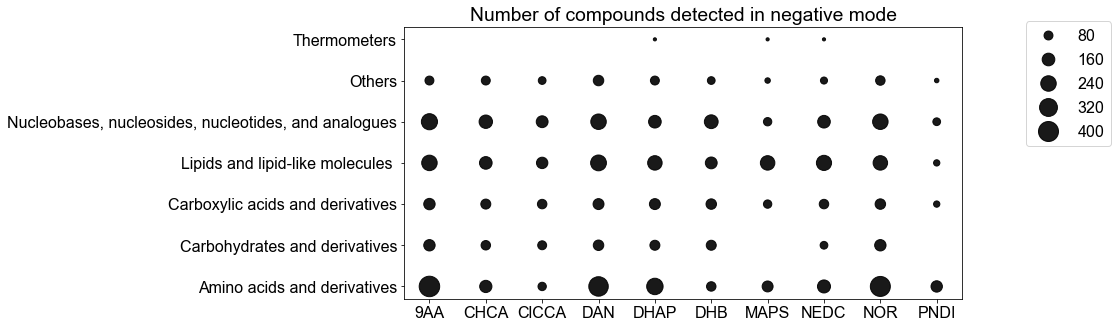

In [352]:
plt.figure(figsize=(10,5))

# font = {'family' : 'arial',
#         'weight' : 'normal',
#         'size'   : 16}

# plt.rc('font', **font)

g = plt.scatter(x = plot_data_filtered['Matrix short'].values, 
            y = plot_data_filtered['coarse_class'].values, 
            s = plot_data_filtered['is_well_filled']*10, alpha=0.9, c='k',
#            c = plot_data_filtered['is_well_filled'],
           label = 'test')
plt.title("Number of compounds detected in negative mode")
plt.legend(*g.legend_elements("sizes", num=6), bbox_to_anchor=(1.1, 1.05))
plt.show()

### Plot 2

In [314]:
hmdb_pka = pd.read_csv(p_analysis / "hmdb_pka.csv", skiprows=1)
df_pka = pd.merge(df, hmdb_pka, on = 'hmdb_primary', how='left') 

In [316]:
df_pka_filtered = df_pka.loc[df_pka.Polarity == 'neg']

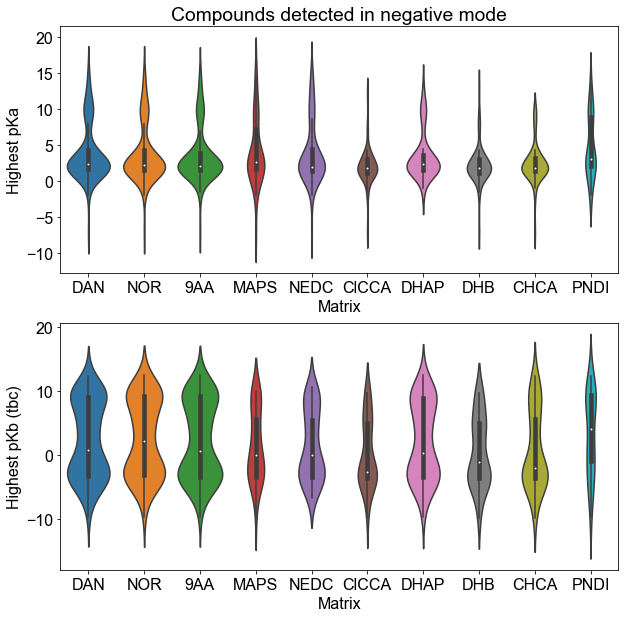

In [317]:
fig, ax = plt.subplots(figsize=(10,10))

plt.subplot(2,1,1)
sns.violinplot(x="Matrix short", y="pka_strongest_acidic", data=df_pka_filtered, scale='count')
plt.xlabel("Matrix")
plt.ylabel("Highest pKa")
plt.title("Compounds detected in negative mode")
plt.subplot(2,1,2)
sns.violinplot(x="Matrix short", y="pka_strongest_basic", data=df_pka_filtered, scale='count')
plt.xlabel("Matrix")
plt.ylabel("Highest pKb (tbc)")
plt.show()

### Plot 3

In [326]:
df_pka_filtered = df_pka.loc[df_pka.Polarity == 'pos']

<AxesSubplot:xlabel='pka_strongest_acidic', ylabel='sum'>

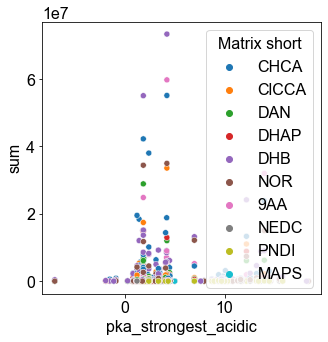

In [327]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=df_pka_filtered, y="sum", x="pka_strongest_acidic", hue="Matrix short")
# ax.set_xlim([0, 1e5])

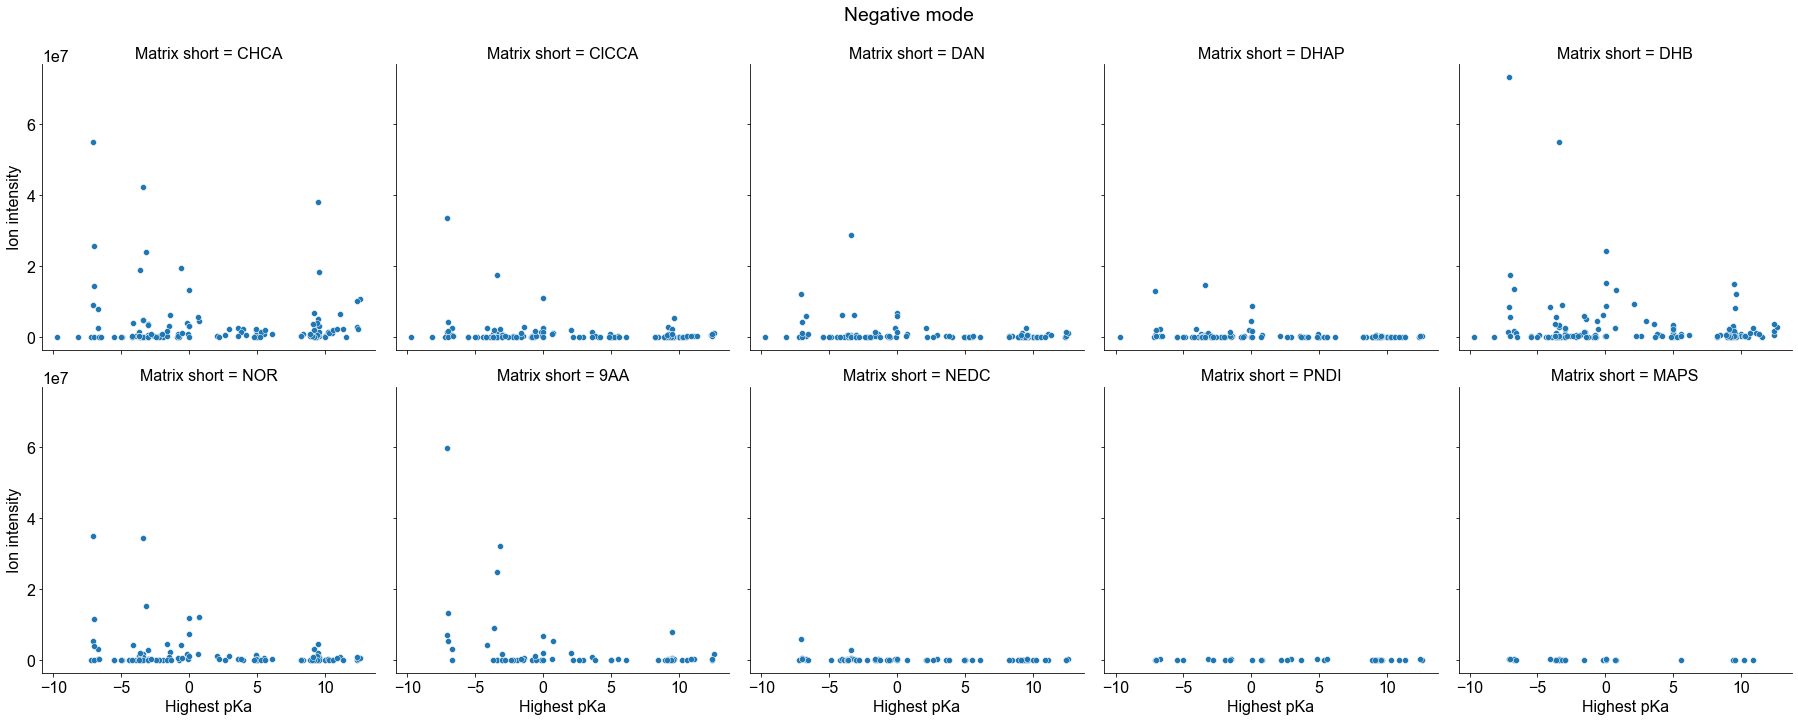

In [328]:
g = sns.relplot(
    data=df_pka_filtered, x="pka_strongest_basic", y="sum",
    col="Matrix short", col_wrap=5,
    kind="scatter"
)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Negative mode')
g.set_axis_labels("Highest pKa", "Ion intensity")
plt.show()